<a href="https://colab.research.google.com/github/cpaniaguam/CSC104/blob/main/CSC104MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submit a notebook file to the assingment on Canvas. Be sure to include your name at the top. You may edit the heading below this line.

## Donnie Aikins


---



Consider the [`county`](https://www.rdocumentation.org/packages/openintro/versions/1.7.1/topics/countyComplete) dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
df=pd.read_csv('https://raw.githubusercontent.com/cpaniaguam/CSC104/main/county_complete.csv')

In [2]:
df.head(7)

,state,name,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017
0,Alabama,Autauga County,1001,"43,671.000",54571,"55,199.000","54,927.000","54,695.000","54,864.000","54,838.000",...,"1,325.000",5.110,8.800,1.1,3.200,0.000,"25,909.000","24,908.000","1,001.000",3.860
1,Alabama,Baldwin County,1003,"140,415.000",182265,"186,534.000","190,048.000","194,736.000","199,064.000","202,863.000",...,"4,844.000",5.350,10.800,2.4,3.500,0.400,"91,567.000","87,915.000","3,652.000",3.990
2,Alabama,Barbour County,1005,"29,038.000",27457,"27,351.000","27,175.000","26,947.000","26,749.000","26,264.000",...,702.000,8.360,12.300,4.1,4.600,0.000,"8,236.000","7,750.000",486.000,5.900
3,Alabama,Bibb County,1007,"20,826.000",22915,"22,745.000","22,658.000","22,503.000","22,533.000","22,561.000",...,557.000,6.470,8.100,2.7,1.800,0.000,"8,506.000","8,133.000",373.000,4.390
4,Alabama,Blount County,1009,"51,024.000",57322,"57,562.000","57,595.000","57,623.000","57,546.000","57,590.000",...,"1,328.000",5.400,11.000,3.9,5.700,0.200,"24,494.000","23,509.000",985.000,4.020
5,Alabama,Bullock County,1011,"11,714.000",10914,"10,675.000","10,612.000","10,549.000","10,673.000","10,419.000",...,331.000,6.860,14.100,0,1.200,0.000,"4,812.000","4,575.000",237.000,4.930
6,Alabama,Butler County,1013,"21,399.000",20947,"20,880.000","20,688.000","20,372.000","20,327.000","20,141.000",...,637.000,6.930,11.400,1.5,2.800,0.000,"8,946.000","8,455.000",491.000,5.490


**Question 1: Change in population**
1. Add a new column `pop_change` to `df` with the population change of each county from 2010 to 2017, and answer the following.
2. List the top 10 counties in which `pop_change` increased the most.
3. List the 10 counties in which `pop_change` increased the least.
4. List the 10 counties in which `pop_change` decreased the most. 
5. Produce appropiate visualizations for these statistics.


**1**

Add a new column `pop_change` to `df` with the population change of each county from 2010 to 2017, and answer the following.

In [3]:
df['pop_change'] = df.apply(lambda row: (row.pop2017 - row.pop2010), axis= 1)

**2**

List the top 10 counties in which `pop_change` increased the most.

In [4]:
most_increase = df.sort_values(by= 'pop_change', ascending= False)
most_increase_list = []
print("Top 10 counties that increased the most \n")
for x in most_increase.iloc[:10, 1]:  
    most_increase_list.append(x)
    print(x)

Top 10 counties that increased the most 

Harris County
Maricopa County
Los Angeles County
King County
Miami-Dade County
Clark County
Dallas County
Tarrant County
Bexar County
San Diego County


In [5]:
most_increase['pop_change'][:10]
for x in most_increase['pop_change'][:10]:
    print(x)

560521.0
489916.0
344902.0
257400.0
255361.0
252810.0
250009.0
245441.0
243805.0
242372.0


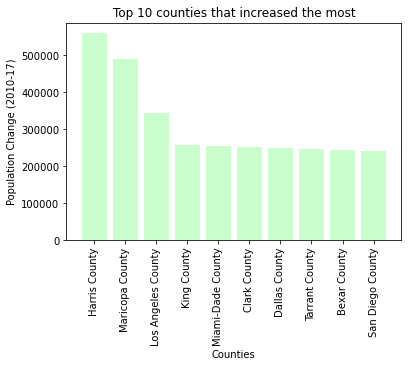

In [6]:
plt.bar(most_increase_list, ([x for x in most_increase['pop_change'][:10]]), color= '#cbfece')
plt.xlabel("Counties")
plt.ylabel("Population Change (2010-17)")
plt.tick_params(axis='x', rotation=90)

plt.title("Top 10 counties that increased the most")
plt.show()

**3**

List the 10 counties in which `pop_change` increased the least.

In [7]:
least_increase = df.sort_values(by= 'pop_change', ascending= True)
least_increase_list = []
print("Top 10 counties that increased the least \n")
least_increase = least_increase.drop(least_increase[least_increase.pop_change < 0].index)
for x in least_increase.iloc[:10, 1]:
    least_increase_list.append(x)
    print(x)

Top 10 counties that increased the least 

Wheeler County
Graves County
Kenedy County
Greeley County
Dolores County
Wibaux County
Clinton County
Blaine County
Chase County
Montour County


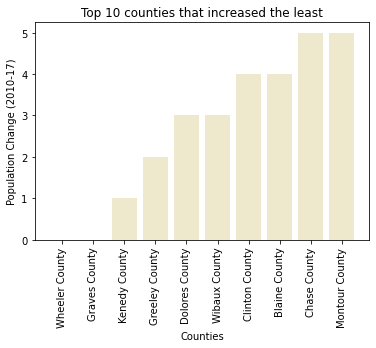

In [8]:
plt.bar(least_increase_list, ([x for x in least_increase['pop_change'][:10]]), color= '#eee8cd', )
plt.xlabel("Counties")
plt.ylabel("Population Change (2010-17)")
plt.tick_params(axis='x', rotation=90)

plt.title("Top 10 counties that increased the least")
plt.show()

**4**

List the 10 counties in which `pop_change` decreased the most. 

In [9]:
most_decrease = df.sort_values(by= 'pop_change', ascending= True)
most_decrease_list = []
print("Top 10 counties that decreased the most \n")
for x in most_decrease.iloc[:10, 1]:
    most_decrease_list.append(x)
    print(x)

Top 10 counties that decreased the most 

Wayne County
Cuyahoga County
Genesee County
Westmoreland County
Lucas County
St. Louis city
Cambria County
Winnebago County
Lake County
Trumbull County


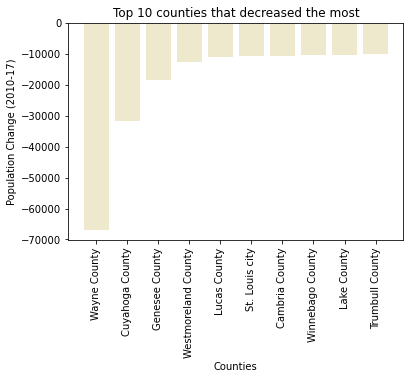

In [10]:
plt.bar(most_decrease_list, ([x for x in most_decrease['pop_change'][:10]]), color= '#eee8cd', )
plt.xlabel("Counties")
plt.ylabel("Population Change (2010-17)")
plt.tick_params(axis='x', rotation=90)

plt.title("Top 10 counties that decreased the most")
plt.show()

**Question 2: Counties populations**

1. What is the mean population $\bar{x}_{pop}$ and standard deviation $s_{pop}$ for all US counties in 2017?</li>
2. What is the median population for all US counties in 2017?</li>
3. List 10 counties (and their respective states) that are within one $s_{pop}$ from the mean population $\bar{x}_{pop}$. Are there any in the State of Rhode Island?
4. What proportion of all counties fall within one $s_{pop}$ from $\bar{x}_{pop}$?
5. What proportion of all counties *do not* fall within *two* standard deviations from $\bar{x}_{pop}$? How many are there? Store them in a data structure of your choice named `counties_greater_2sd`.
6. Construct a vertical dot plot for the `pop2017` variable and identify what counties are labeled as outliers. Store these counties in a variable `outliers`.  Compare and contrast `outliers` with `counties_greater_2sd`.
7. Which statistic is a better descriptor for `pop2017`, its mean $\bar{x}_{pop}$ or its median. Explain.

**1 & 2**

What is the mean population $\bar{x}_{pop}$ and standard deviation $s_{pop}$ for all US counties in 2017?

What is the median population for all US counties in 2017?

In [11]:
df.describe()
# mean: 103763.414
# standard deviation: 333194.519
# median (50% quartile): 25857

,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,...,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
count,"3,142.000","3,139.000","3,142.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000",...,"3,139.000","3,139.000","3,140.000","3,140.000","3,140.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000"
mean,"30,383.688","89,649.990","98,262.036","99,279.645","100,027.939","100,741.918","101,502.675","102,272.742","103,026.492","103,763.414",...,"2,464.917",5.230,11.143,6.802,0.352,"51,157.182","48,929.221","2,227.961",4.611,"5,409.215"
std,"15,162.446","292,547.668","312,946.700","316,688.641","319,944.371","322,954.931","325,944.401","328,885.230","331,294.620","333,194.519",...,"8,360.253",1.879,5.190,5.257,1.087,"167,725.639","160,283.439","7,577.964",1.649,"25,760.929"
min,"1,001.000",67.000,82.000,90.000,86.000,89.000,89.000,88.000,88.000,88.000,...,4.000,1.670,2.100,0.000,0.000,100.000,95.000,5.000,1.620,"-66,968.000"
25%,"18,177.500","11,223.500","11,114.500","11,140.000","11,035.000","11,048.000","10,994.500","10,969.000","10,970.000","10,975.500",...,258.500,3.980,7.300,3.400,0.000,"4,932.000","4,703.000",224.000,3.520,-538.000
50%,"29,176.000","24,621.000","25,872.000","25,839.000","25,797.000","25,725.000","25,680.000","25,647.000","25,774.000","25,857.000",...,622.000,4.930,10.300,5.400,0.000,"11,573.000","11,006.000",534.000,4.360,-54.000
75%,"45,080.500","61,775.000","66,780.000","67,128.500","67,177.000","67,589.500","67,733.500","67,597.500","67,505.000","67,756.000",...,"1,637.000",6.130,13.700,8.800,0.400,"31,617.000","30,069.000","1,439.500",5.355,"1,371.500"
max,"56,045.000","9,519,338.000","9,818,605.000","9,885,998.000","9,956,152.000","10,018,604.000","10,072,695.000","10,123,248.000","10,150,558.000","10,163,507.000",...,"265,433.000",23.640,48.200,57.100,33.300,"5,123,933.000","4,883,640.000","240,293.000",19.070,"560,521.000"


**3**

List 10 counties (and their respective states) that are within one $s_{pop}$ from the mean population $\bar{x}_{pop}$. Are there any in the State of Rhode Island?

In [12]:
counties_one_std = []
lower_bound = 0 #population cannot be negative
upper_bound = df['pop2017'].mean() + df['pop2017'].std()

In [13]:
one_std = df.loc[(df.pop2017 <= upper_bound)]
one_std.shape

(2977, 143)

In [14]:
one_std.loc[(df.state == 'Rhode Island')]

,state,name,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
2311,Rhode Island,Bristol County,44001,"50,648.000",49875,"49,212.000","49,214.000","49,207.000","49,047.000","49,096.000",...,4.640,4.200,1.3,2.000,0.500,"26,179.000","25,176.000","1,003.000",3.830,-963.000
2312,Rhode Island,Kent County,44003,"167,090.000",166158,"165,230.000","164,608.000","164,356.000","164,513.000","163,740.000",...,4.740,4.700,2.9,2.500,0.100,"91,029.000","87,306.000","3,723.000",4.090,"-2,398.000"
2313,Rhode Island,Newport County,44005,"85,433.000",82888,"83,152.000","83,119.000","82,824.000","82,822.000","83,419.000",...,4.720,5.800,4.4,4.500,0.100,"44,318.000","42,580.000","1,738.000",3.920,572.000
2315,Rhode Island,Washington County,44009,"123,546.000",126979,"126,471.000","126,223.000","126,364.000","126,313.000","126,142.000",...,4.760,4.000,1.3,1.300,0.000,"69,144.000","66,369.000","2,775.000",4.010,-829.000


In [15]:
for name in one_std.loc[(df.state == 'Rhode Island')].name:
    counties_one_std.append(name)

In [16]:
counties_one_std

['Bristol County', 'Kent County', 'Newport County', 'Washington County']

In [17]:
for name in one_std.sample(n=6).name: #select random rows from dataframe
    counties_one_std.append(name)

In [18]:
counties_one_std

['Bristol County',
 'Kent County',
 'Newport County',
 'Washington County',
 'Lowndes County',
 'Ottawa County',
 'Delaware County',
 'Wayne County',
 'Slope County',
 'Comanche County']

**4**

What proportion of all counties fall within one $s_{pop}$ from $\bar{x}_{pop}$?

In [19]:
proportion = (one_std.shape[0]/df.shape[0])
print("The proportion of all counties fall within one standard deviation from the mean is {:.2f}".format(proportion))

The proportion of all counties fall within one standard deviation from the mean is 0.95


**5**

What proportion of all counties *do not* fall within *two* standard deviations from $\bar{x}_{pop}$? How many are there? Store them in a data structure of your choice named `counties_greater_2sd`.

In [20]:
upper_bound2 = df['pop2017'].mean() + (df['pop2017'].std() * 2)
counties_greater_2sd = df.loc[(df.pop2017 >= upper_bound2)]
counties_greater_2sd

#83 counties

,state,name,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
103,Arizona,Maricopa County,4013,"3,072,149.000",3817117,"3,869,626.000","3,939,776.000","4,006,307.000","4,076,708.000","4,154,076.000",...,4.570,12.300,7.2,9.000,0.700,"2,134,987.000","2,045,885.000","89,102.000",4.170,"489,916.000"
106,Arizona,Pima County,4019,"843,746.000",980263,"987,297.000","991,528.000","994,759.000","1,000,916.000","1,005,323.000",...,4.950,11.000,7.3,8.600,0.300,"475,622.000","454,292.000","21,330.000",4.480,"42,506.000"
186,California,Alameda County,6001,"1,443,741.000",1510271,"1,532,215.000","1,556,648.000","1,582,936.000","1,611,572.000","1,637,141.000",...,4.280,6.900,2.8,3.200,0.700,"848,335.000","817,433.000","30,902.000",3.640,"152,919.000"
192,California,Contra Costa County,6013,"948,816.000",1049025,"1,066,182.000","1,079,093.000","1,095,310.000","1,110,971.000","1,126,027.000",...,4.460,7.200,2,3.100,0.600,"563,863.000","542,445.000","21,418.000",3.800,"98,414.000"
195,California,Fresno County,6019,"799,407.000",930450,"940,360.000","946,851.000","953,787.000","963,170.000","972,333.000",...,9.510,11.700,2.6,4.000,1.100,"449,595.000","411,525.000","38,070.000",8.470,"58,805.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,Virginia,Fairfax County,51059,"969,749.000",1081726,"1,105,720.000","1,121,834.000","1,135,460.000","1,139,292.000","1,142,197.000",...,3.260,9.400,3.6,5.300,2.700,"629,698.000","610,531.000","19,167.000",3.040,"66,707.000"
2969,Washington,King County,53033,"1,737,034.000",1931249,"1,972,205.000","2,009,295.000","2,047,039.000","2,081,249.000","2,117,696.000",...,3.940,7.000,2.3,2.800,0.400,"1,230,208.000","1,184,708.000","45,500.000",3.700,"257,400.000"
2979,Washington,Pierce County,53053,"700,820.000",795225,"802,828.000","810,928.000","819,164.000","828,819.000","841,466.000",...,5.950,8.100,2.9,3.600,0.300,"417,219.000","394,842.000","22,377.000",5.360,"81,539.000"
2983,Washington,Snohomish County,53061,"606,024.000",713335,"721,837.000","731,997.000","744,377.000","757,121.000","769,444.000",...,4.330,7.800,3.5,4.300,0.400,"421,369.000","403,989.000","17,380.000",4.120,"88,298.000"


In [21]:
proportion2 = (counties_greater_2sd.shape[0]/df.shape[0])
print("The proportion of all counties that do not fall within two standard deviations from the mean is {:.2f}".format(proportion2)) 

The proportion of all counties that do not fall within two standard deviations from the mean is 0.03


**6**

Construct a vertical box plot for the `pop2017` variable and identify what counties are labeled as outliers. Store these counties in a variable `outliers`.  Compare and contrast `outliers` with `counties_greater_2sd`.

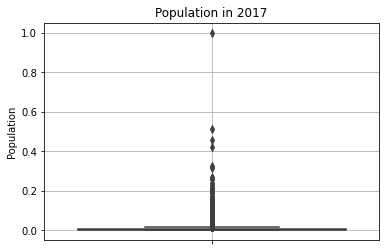

In [22]:
plt.title("Population in 2017")
sns.boxplot(y=df['pop2017']/df['pop2017'].max())
plt.ylabel("Population")
plt.grid(True)
plt.show()

In [23]:
df.describe()

,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,...,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
count,"3,142.000","3,139.000","3,142.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000",...,"3,139.000","3,139.000","3,140.000","3,140.000","3,140.000","3,139.000","3,139.000","3,139.000","3,139.000","3,139.000"
mean,"30,383.688","89,649.990","98,262.036","99,279.645","100,027.939","100,741.918","101,502.675","102,272.742","103,026.492","103,763.414",...,"2,464.917",5.230,11.143,6.802,0.352,"51,157.182","48,929.221","2,227.961",4.611,"5,409.215"
std,"15,162.446","292,547.668","312,946.700","316,688.641","319,944.371","322,954.931","325,944.401","328,885.230","331,294.620","333,194.519",...,"8,360.253",1.879,5.190,5.257,1.087,"167,725.639","160,283.439","7,577.964",1.649,"25,760.929"
min,"1,001.000",67.000,82.000,90.000,86.000,89.000,89.000,88.000,88.000,88.000,...,4.000,1.670,2.100,0.000,0.000,100.000,95.000,5.000,1.620,"-66,968.000"
25%,"18,177.500","11,223.500","11,114.500","11,140.000","11,035.000","11,048.000","10,994.500","10,969.000","10,970.000","10,975.500",...,258.500,3.980,7.300,3.400,0.000,"4,932.000","4,703.000",224.000,3.520,-538.000
50%,"29,176.000","24,621.000","25,872.000","25,839.000","25,797.000","25,725.000","25,680.000","25,647.000","25,774.000","25,857.000",...,622.000,4.930,10.300,5.400,0.000,"11,573.000","11,006.000",534.000,4.360,-54.000
75%,"45,080.500","61,775.000","66,780.000","67,128.500","67,177.000","67,589.500","67,733.500","67,597.500","67,505.000","67,756.000",...,"1,637.000",6.130,13.700,8.800,0.400,"31,617.000","30,069.000","1,439.500",5.355,"1,371.500"
max,"56,045.000","9,519,338.000","9,818,605.000","9,885,998.000","9,956,152.000","10,018,604.000","10,072,695.000","10,123,248.000","10,150,558.000","10,163,507.000",...,"265,433.000",23.640,48.200,57.100,33.300,"5,123,933.000","4,883,640.000","240,293.000",19.070,"560,521.000"


In [24]:
counties_greater_2sd.describe()

,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,...,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
count,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,...,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000
mean,"27,015.084","1,307,905.831","1,427,200.795","1,446,297.277","1,462,602.554","1,477,423.880","1,492,403.964","1,507,061.904","1,519,868.988","1,530,844.976",...,"36,558.747",4.751,10.422,5.243,0.920,"773,909.554","740,518.289","33,391.265",4.303,"103,644.181"
std,"16,185.459","1,189,259.282","1,234,138.129","1,245,402.401","1,256,726.815","1,267,217.570","1,277,090.501","1,286,636.748","1,292,985.855","1,296,548.143",...,"34,595.830",1.246,4.971,2.995,0.801,"646,666.443","616,453.198","31,042.083",1.113,"105,648.636"
min,"4,013.000","432,976.000","662,614.000","685,934.000","708,139.000","729,013.000","753,511.000","764,341.000","767,335.000","771,158.000",...,"12,982.000",2.760,2.800,1.400,0.100,"341,602.000","316,347.000","10,554.000",2.240,"-66,968.000"
25%,"12,044.000","765,512.500","831,474.500","837,262.500","843,948.000","856,954.000","867,984.000","872,963.500","880,594.500","888,741.000",...,"20,658.500",4.115,6.850,2.950,0.400,"455,174.000","439,727.000","18,864.000",3.665,"31,018.000"
50%,"26,125.000","904,161.000","971,777.000","987,297.000","991,528.000","994,759.000","1,000,967.000","1,023,859.000","1,048,332.000","1,058,810.000",...,"24,842.000",4.480,9.600,4.200,0.700,"563,863.000","542,445.000","22,784.000",4.090,"75,916.000"
75%,"39,585.000","1,431,555.000","1,518,138.500","1,535,932.000","1,554,296.000","1,570,981.500","1,592,328.000","1,611,027.500","1,623,775.000","1,633,068.500",...,"40,289.500",5.280,12.600,7.050,1.150,"818,711.500","782,289.000","36,855.500",4.665,"154,715.000"
max,"55,079.000","9,519,338.000","9,818,605.000","9,885,998.000","9,956,152.000","10,018,604.000","10,072,695.000","10,123,248.000","10,150,558.000","10,163,507.000",...,"265,433.000",10.410,31.600,15.500,4.000,"5,123,933.000","4,883,640.000","240,293.000",9.210,"560,521.000"


In [25]:
# df pop2017 q1: 10975, q3: 67756
outlier_upper = 67756 + 1.5*(67756-10975)
outlier_lower = 10975 - 1.5*(67756-10975)
# counties_greater_2sd pop2017 q1: 888741, q3: 1633068.5

In [30]:
outliers = []
outlier_df = df.loc[(df.pop2017 >= outlier_lower)] #no need for negative because outlier_lower < 0, population cannot be negative
for name in df['name']:
    outliers.append(name)

In [31]:
outlier_df #3139 different counties
counties_greater_2sd #83 different counties

# all of counties greater than 2sd from mean are outliers. 2.6% of all outliers are counties greater than 2sd from mean. As expected

,state,name,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,pop_change
103,Arizona,Maricopa County,4013,"3,072,149.000",3817117,"3,869,626.000","3,939,776.000","4,006,307.000","4,076,708.000","4,154,076.000",...,4.570,12.300,7.2,9.000,0.700,"2,134,987.000","2,045,885.000","89,102.000",4.170,"489,916.000"
106,Arizona,Pima County,4019,"843,746.000",980263,"987,297.000","991,528.000","994,759.000","1,000,916.000","1,005,323.000",...,4.950,11.000,7.3,8.600,0.300,"475,622.000","454,292.000","21,330.000",4.480,"42,506.000"
186,California,Alameda County,6001,"1,443,741.000",1510271,"1,532,215.000","1,556,648.000","1,582,936.000","1,611,572.000","1,637,141.000",...,4.280,6.900,2.8,3.200,0.700,"848,335.000","817,433.000","30,902.000",3.640,"152,919.000"
192,California,Contra Costa County,6013,"948,816.000",1049025,"1,066,182.000","1,079,093.000","1,095,310.000","1,110,971.000","1,126,027.000",...,4.460,7.200,2,3.100,0.600,"563,863.000","542,445.000","21,418.000",3.800,"98,414.000"
195,California,Fresno County,6019,"799,407.000",930450,"940,360.000","946,851.000","953,787.000","963,170.000","972,333.000",...,9.510,11.700,2.6,4.000,1.100,"449,595.000","411,525.000","38,070.000",8.470,"58,805.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,Virginia,Fairfax County,51059,"969,749.000",1081726,"1,105,720.000","1,121,834.000","1,135,460.000","1,139,292.000","1,142,197.000",...,3.260,9.400,3.6,5.300,2.700,"629,698.000","610,531.000","19,167.000",3.040,"66,707.000"
2969,Washington,King County,53033,"1,737,034.000",1931249,"1,972,205.000","2,009,295.000","2,047,039.000","2,081,249.000","2,117,696.000",...,3.940,7.000,2.3,2.800,0.400,"1,230,208.000","1,184,708.000","45,500.000",3.700,"257,400.000"
2979,Washington,Pierce County,53053,"700,820.000",795225,"802,828.000","810,928.000","819,164.000","828,819.000","841,466.000",...,5.950,8.100,2.9,3.600,0.300,"417,219.000","394,842.000","22,377.000",5.360,"81,539.000"
2983,Washington,Snohomish County,53061,"606,024.000",713335,"721,837.000","731,997.000","744,377.000","757,121.000","769,444.000",...,4.330,7.800,3.5,4.300,0.400,"421,369.000","403,989.000","17,380.000",4.120,"88,298.000"


**7**

Which statistic is a better descriptor for `pop2017`, its mean $\bar{x}_{pop}$ or its median. Explain.

Using the median is a better statistic for `pop2017` because the median does not take outliers into account - it is robust against outliers.

**Question 3**
1. What is the population of the US in 2017?
2. Define a new variable `pop_proportion_2017` with the relative population of each county with respect to the US population in 2017.
3. Construct a histogram using `pop_proportion_2017` and an adequate number of bins. What can you say about this distribution?

**1**

What is the population of the US in 2017?

In [27]:
df['pop2017'].sum()

325713355.0

**2**

Define a new variable `pop_proportion_2017` with the relative population of each county with respect to the US population in 2017.

In [28]:
pop_proportion_2017 = [row/df['pop2017'].sum() for row in df['pop2017']]

**3**

Construct a histogram using `pop_proportion_2017` and an adequate number of bins. What can you say about this distribution?

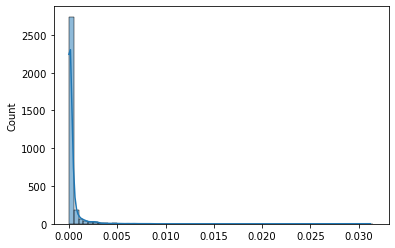

In [29]:
sns.histplot(x= pop_proportion_2017, bins= 10, binwidth= 0.0005, kde=True)
plt.show()

Right skewed distribution, perhaps because of natural carrying capcity limit (population)